# Предсказание уровня удовлетворенности рабочих и вероятности увольнения из компании

Описание проекта: HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом. Необходимо на основе имеющихся данных предсказать уровень удовлетворенности рабочих и вероятность их увольнения.
    
Цель исследования: построить две модели: для предсказания удовлетворенности и для предсказания увольнения
    
Ход исследования:

    Задача 1:
    
    Загрузка данных: загрузка и изучение общей информации из предоставленных датасетов
    
    Предобработка данных: обработка пропущенных значений, удаление дубликатов и т.д.
    
    Исследовательский анализ данных: статистический анализ всех признаков
    
    Корреляционный анализ данных: расчет коэффициентов корреляции для всех признаков
    
    Подготовка данных: выполнить кодировку данных с помощью пайплайна
    
    Обучение моделей: обучение двух моделей и выбор лучшей из них по метрике SMOTE
    
    Выводы
    
    Задача 2:
    
    Загрузка данных: загрузка и изучение общей информации из предоставленных датасетов
    
    Предобработка данных: обработка пропущенных значений, удаление дубликатов и т.д.
    
    Исследовательский анализ данных: составление портрета "уволившегося сотрудника"
    
    Корреляционный анализ данных: расчет коэффициентов корреляции для всех признаков
    
    Добавление нового входного признака: добавление признака удовлетворенности в датасет
    
    Обучение моделей: обучение двух моделей и выбор лучшей из них по метрике ROC-AUC
    
    Выводы
    
    
Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

# Задача 1

## Загрузка данных

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import matplotlib.pyplot as plt
!"{sys.executable}" -m pip install phik -q
import phik
!pip install eli5 -q
!pip install -U scikit-learn -q
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import(
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder
)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import(
    roc_auc_score,
    make_scorer
)
from sklearn.linear_model import(
    LinearRegression,
    LogisticRegression
)
from sklearn.tree import(
    DecisionTreeRegressor,
    DecisionTreeClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import(
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.dummy import DummyRegressor

plt.rcParams["figure.figsize"] = (30,20) 
RANDOM_STATE=42

In [46]:
train_job=pd.read_csv("train_job_satisfaction_rate.csv")
display(train_job)
train_job.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [47]:
test_features=pd.read_csv('test_features.csv')
display(test_features)
test_features.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [48]:
test_target=pd.read_csv('test_target_job_satisfaction_rate.csv')
display(test_target)
test_target.info()


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
...,...,...
1995,405257,0.28
1996,370925,0.21
1997,857722,0.39
1998,303402,0.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


## Предобработка данных

Проверю данные на наличие дубликатов и пропусков

In [49]:
print(train_job.duplicated().sum())
print(test_features.duplicated().sum())
print(test_target.duplicated().sum())

0
0
0


Если в столбце id найдено два одинаковых значения, одно из них следует удалить, ведь это значит, что данные про одного и того же человека попали в датасет.

In [50]:
print(train_job.duplicated(subset=['id']).sum())
print(test_features.duplicated(subset=['id']).sum())
print(test_target.duplicated(subset=['id']).sum())

0
0
0


In [51]:
print(train_job.isna().sum())
print(test_features.isna().sum())
print(test_target.isna().sum())

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
id                       0
job_satisfaction_rate    0
dtype: int64


Заменю пропуски позже, в пайплайне

## Исследовательский анализ данных

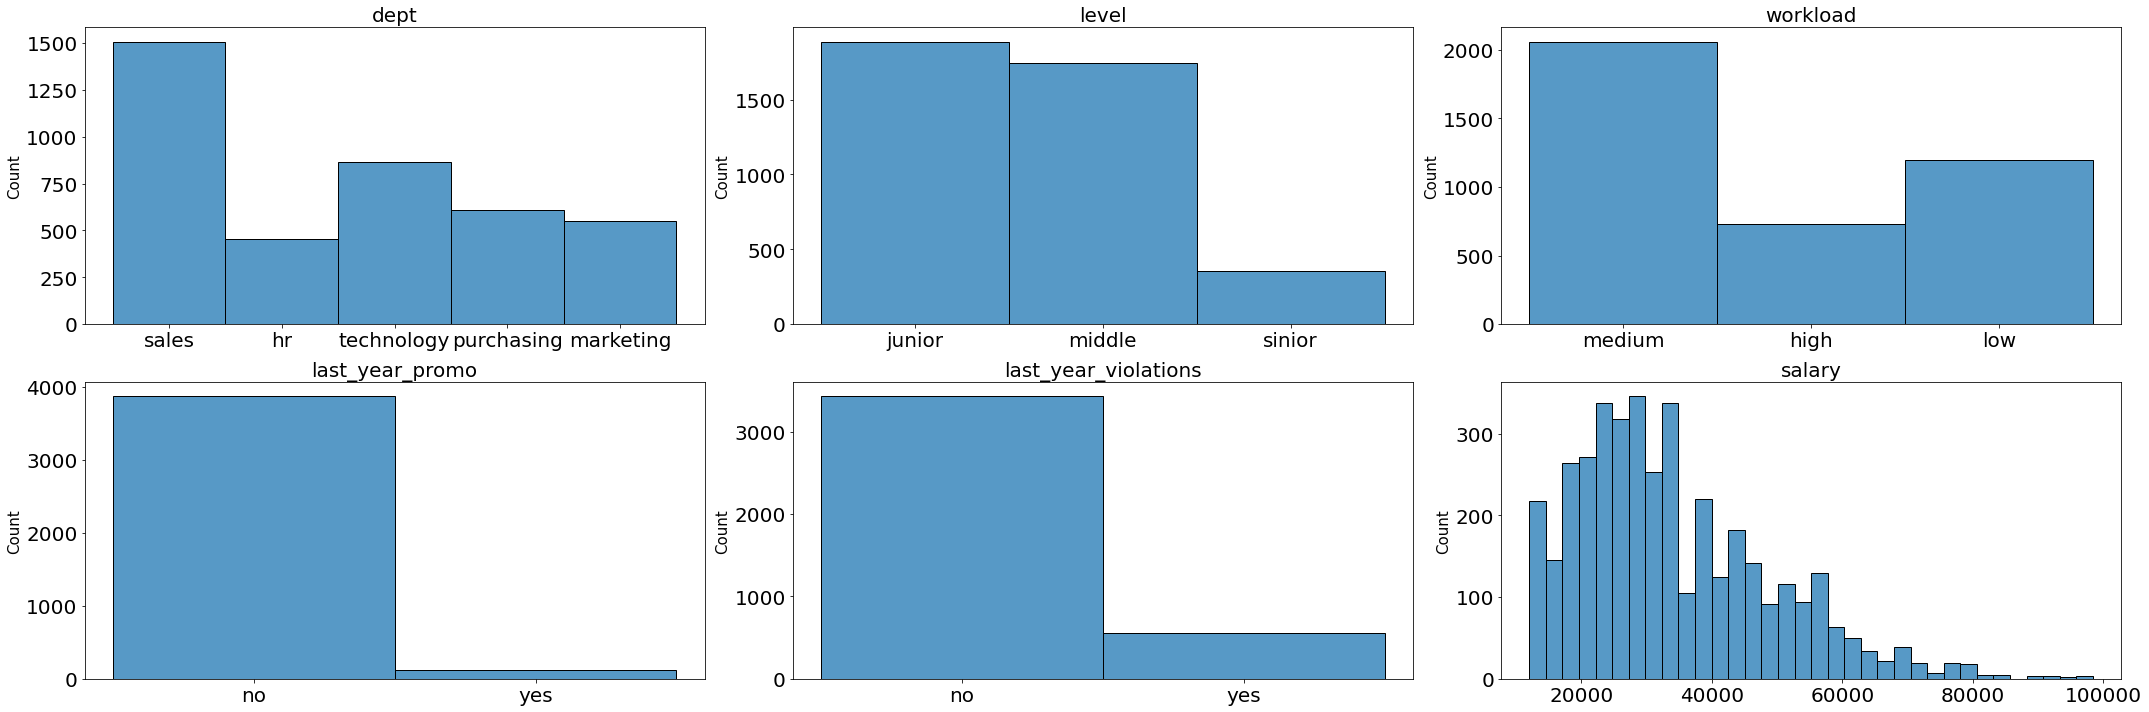

In [52]:
def graphik(data,x,axes,i):
    sns.histplot(ax=axes,data=data,x=x)
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
features=train_job.drop(columns=['id','job_satisfaction_rate','employment_years','supervisor_evaluation']).columns
train=train_job.dropna()
for i,feature in enumerate(features):
    graphik(train, feature, axes[i],feature);
    axes[i].set_title(feature,fontsize=20)
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count",fontsize=15)
plt.tight_layout() 
plt.show()

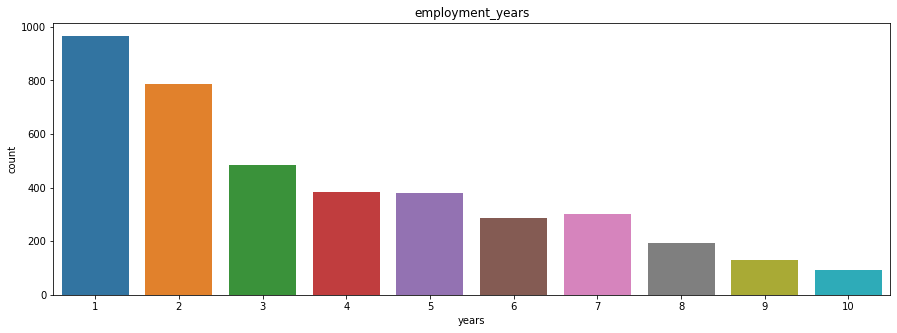

In [53]:
plt.figure(figsize=(15,5))
plt.title('employment_years')
plt.xlabel('years')
sns.barplot(x=train_job.employment_years.value_counts().index, y=train_job.employment_years.value_counts())
plt.ylabel('count')
plt.show()

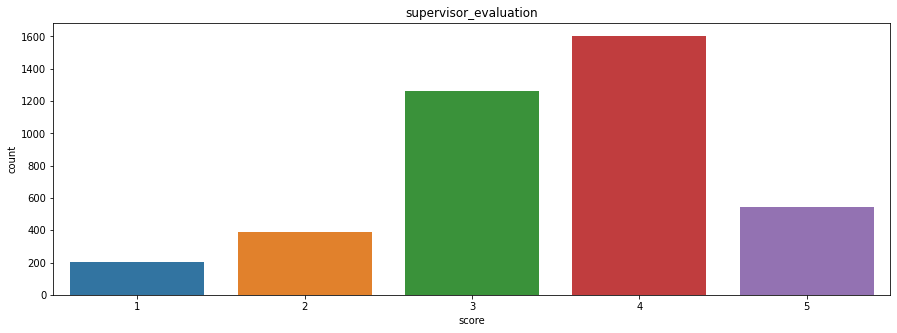

In [54]:
plt.figure(figsize=(15,5))
plt.title('supervisor_evaluation')
plt.xlabel('score')
sns.barplot(x=train_job.supervisor_evaluation.value_counts().index, y=train_job.supervisor_evaluation.value_counts())
plt.ylabel('count')
plt.show()

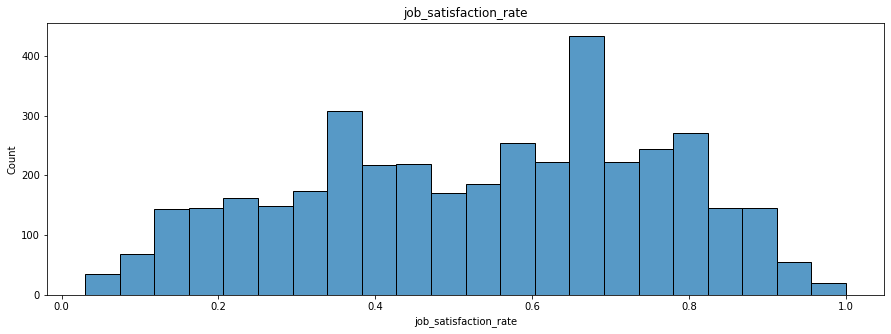

In [55]:
plt.figure(figsize=(15,5))
sns.histplot(data=train, x=train['job_satisfaction_rate'])
plt.title('job_satisfaction_rate')
plt.show()


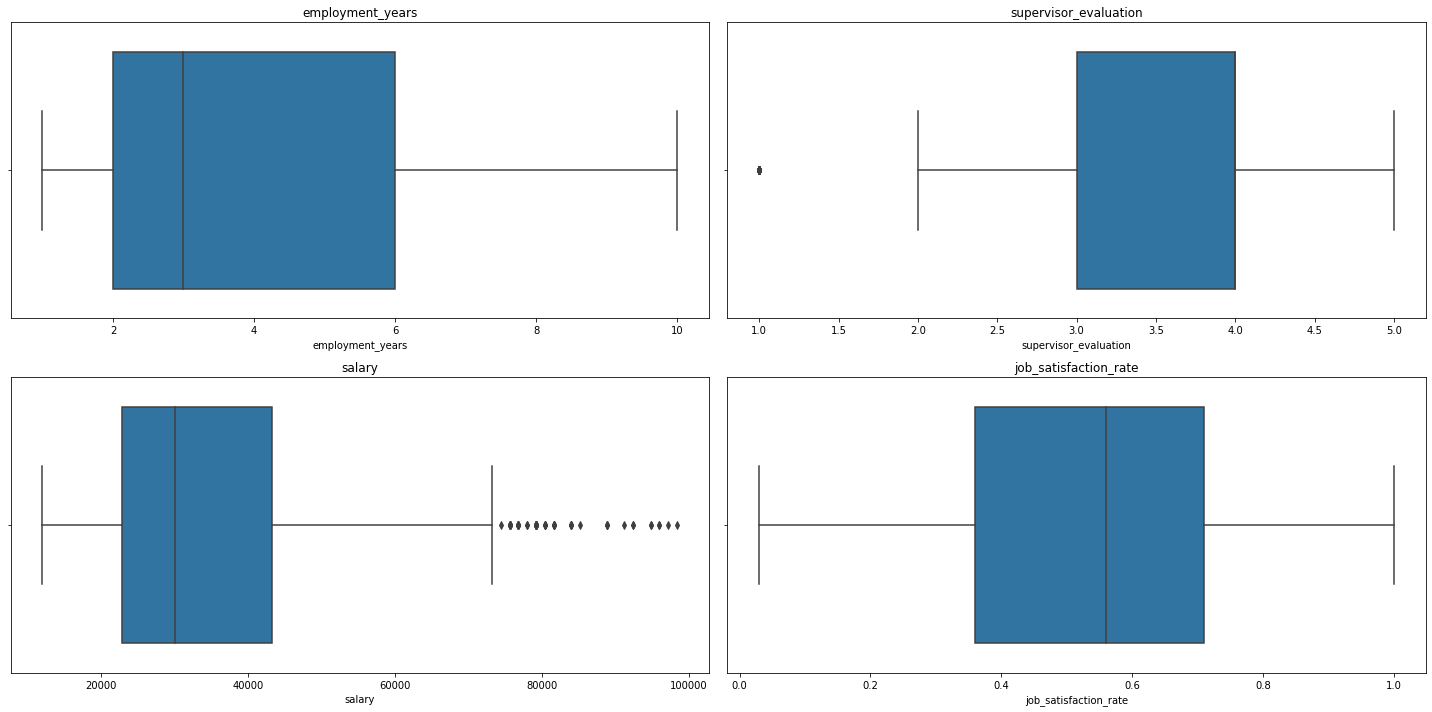

In [56]:
def graphikbox(data,x,axos):
    sns.boxplot(ax=axos,data=data,x=x)
fig, axes = plt.subplots(2,2, figsize=(20, 10))
graphikbox(train,train['employment_years'],axes[0][0])
axes[0][0].set_title('employment_years')
graphikbox(train,train['supervisor_evaluation'],axes[0][1])
axes[0][1].set_title('supervisor_evaluation')
graphikbox(train,train['salary'],axes[1][0])
axes[1][0].set_title('salary')
graphikbox(train,train['job_satisfaction_rate'],axes[1][1])
axes[1][1].set_title('job_satisfaction_rate')
plt.tight_layout() 
plt.show()

Большинство сотрудников работает в департаменте "Продажи". 

Что касается уровня занимаемой должности, джунов и миддлов примерно одинаковое количество, а сеньоров намного меньше, ведь далеко не каждый может развиться до уровня сеньора.

Уровень загруженности в большинстве своем у сотрудников средний, однако тех, у кого загрузка высокая, меньше, чем рабочих с низкой нагрузкой в 1.5 раза

Большинство сотрудников недавно работают в компании: 1-2 года, а тех кто работает в компании 9-10 лет достаточно мало.

Повышения в прошлом году были достойны очень немногие: около 100 человек. Как будто оптимальное значение, чтобы не так сильно увеличивать расходы.

Трудовой договор в среднем нарушает каждый 8 человек.

Большинство сотрудников руководитель оценивает на 3-4, людей с неудовлетворительной оценкой(1-2) около 600 значений.

Среднее значение зарплаты- 30 000 рублей, скорее всего это связано с тем, что в компании работает много джунов, чей оклад по определению не может быть очень большим.

Средняя удовлетворенность работы- около 55%, однако в гистограмме наблюдается бимодальное распределение: больше всего людей с удовлетворенностью выше средней(около 70%), однако также много и тех, кто удовлетворен всего на 35%

## Корреляционный анализ признаков

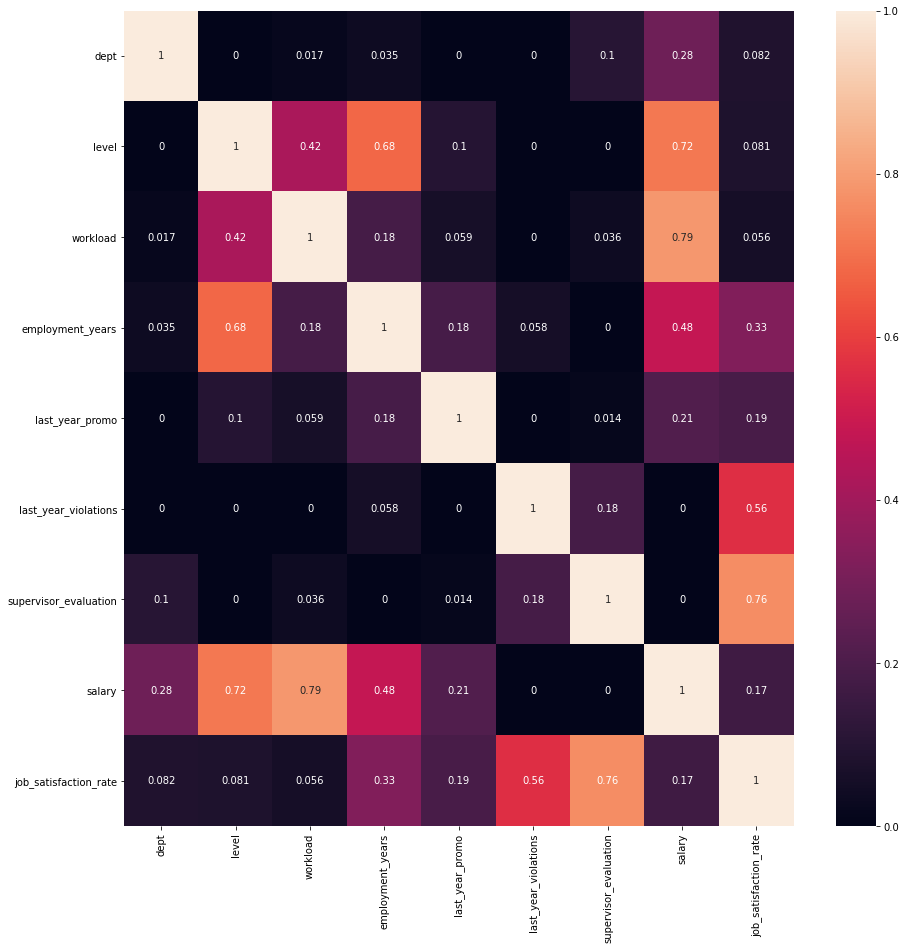

In [57]:
matrix=(train.drop(columns='id').phik_matrix(interval_cols=['job_satisfaction_rate','salary']))
plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True)
plt.show()

На целевой признак сильно влияют нарушения трудового договора в прошлом году, а также оценка руководителя. Это логично- если работник нарушает трудовой договор, значит его не все устраивает на текущем рабочем месте.

Зарплата имеет сильную корреляцию с должностью и рабочей загруженностью: чем больше ты работаешь- тем больше получаешь, чем выше твоя должность, тем выше твоя зарплата.

Уровень сотрудника также коррелирует со стажем: чем дольше ты работаешь, тем скорее всего выше будет должность.

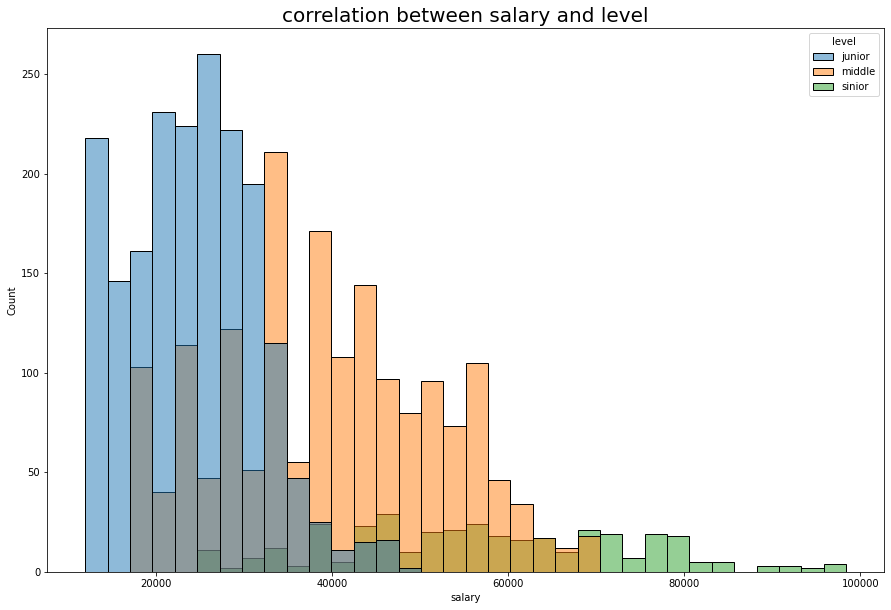

In [58]:
plt.figure(figsize=(15,10))
sns.histplot(data=train,x='salary',hue='level')
plt.title('correlation between salary and level',fontsize=20)
plt.show()

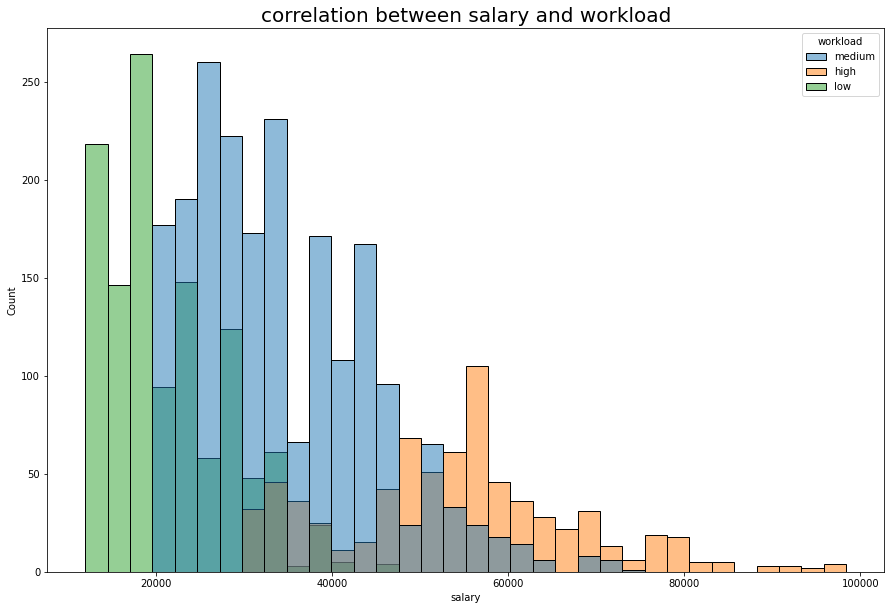

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(data=train,x='salary',hue='workload')
plt.title('correlation between salary and workload',fontsize=20)
plt.show()

Джуны в среднем получают 20-35к, мидлы около 40 тысяч, а сеньоры примерно 60

Люди с низкой загруженностью получают около 15-20 тысяч, со средней загруженностью примерно 35 тысяч, а с высокой загруженностью где-то около 55-60к

## Подготовка данных и обучение модели

Данные в столбце 'dept' можно закодировать с помощью OneHotEncoder, т.к. среди отделов нет иерархии, а вот для столбцов 'level' и 'workload' уже необходимо использовать OrdinalEncoder, т.к. предполагаемых классов>2 + они имеют порядковую последовательность(junior,middle,senior и low,medium,high)


Реализую метрику SMAPE с помощью make_scorer

In [60]:
def Smape(y_test,y_pred):
    metric=2*np.abs(y_test-y_pred)/(y_pred+y_test)
    metric=metric.sum()*100/len(y_test)
    return metric
smape_scorer = make_scorer(Smape, greater_is_better=False)

In [61]:
ohe_columns=['dept','last_year_promo','last_year_violations']
ord_columns=['level','workload']
num_columns=['employment_years','supervisor_evaluation','salary']
ohe_pipe=Pipeline([
    ('simpleImputerohe',SimpleImputer(missing_values=np.nan ,strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'))
])
ord_pipe=Pipeline([
    ('SimpleImputer_before_ord',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
    ('ord',OrdinalEncoder(categories=[
        ['junior','middle','sinior'],
        ['low','medium','high']
    ],
    handle_unknown='use_encoded_value', unknown_value=np.nan
)),
    ('SimpleImputer_after_ord',SimpleImputer(missing_values=np.nan,strategy='most_frequent'))
])
data_preprocessor=ColumnTransformer([
    ('ohe',ohe_pipe,ohe_columns),
    ('ord',ord_pipe,ord_columns),
    ('num',StandardScaler(),num_columns)],
    remainder='passthrough'
)
pipe_final=Pipeline([
    ('preprocessor',data_preprocessor),
    ('models',DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models':[LinearRegression()],
        'preprocessor_num':[StandardScaler(),MinMaxScaler(),'passthrough']
    },
    {
        'models':[DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_split': range(2,10),
        'models__min_samples_leaf': range(2,10)
    }
    
]
y_train=train_job['job_satisfaction_rate']
X_train=train_job.drop(columns=['id','job_satisfaction_rate'])
random=RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3,
    refit='false_positive_rate',
    random_state=RANDOM_STATE,
    scoring=smape_scorer
)
random.fit(X_train, y_train)    
print('Лучшая модель и её параметры:\n\n', random.best_estimator_)
print ('Метрика лучшей модели на кросс-валидационной выборке:', random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=6, models__min_samples_split=3;, score=-15.444 total time=   0.1s
[CV 2/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=6, models__min_samples_split=3;, score=-14.833 total time=   0.1s
[CV 3/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=6, models__min_samples_split=3;, score=-15.012 total time=   0.1s
[CV 4/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=6, models__min_samples_split=3;, score=-15.301 total time=   0.1s
[CV 5/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=6, models__min_samples_split=3;, score=-13.949 total time=   0.1s
[CV 1/5] END models=DecisionTreeRegressor(random_state=42), models__min_samples_leaf=3, models__min_samples_split=7;, score=-14.689 total time=   0.0s
[CV 2/5] END models=DecisionTreeR

В данные тестовой выборки добавлю целевой признак.

In [62]:
test_features=test_features.merge(test_target,on='id')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [63]:
test_features=test_features[test_features['dept']!=' ']
y_true=test_features['job_satisfaction_rate']
X_test=test_features.drop(columns=['id','job_satisfaction_rate'])
y_pred = random.predict(X_test)
Smape(y_true,y_pred)

13.594886217309902

Также необходимо проверить лучшую модель на "адекватность", сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу.

In [64]:
dummy_regr = DummyRegressor(strategy="mean")
X=pipe_final.named_steps['preprocessor'].fit_transform(X_train)
dummy_regr.fit(X, y_train)
y_dummy=dummy_regr.predict(X_test)
Smape(y_true,y_dummy)

38.22950345322774

Можно заметить, что дамми модель справляется с задачей гораздо хуже, значит с нашей моделью все хорошо

Метрика Smape<15 достигнута благодаря модели DecisionTreeRegressor(min_samples_leaf=3, min_samples_split=3,random_state=42). Скорее всего, эта модель справилась лучше благодаря тому, что входные признаки имеют сильную корреляцию с целевым, поэтому, когда происходит деление на два листа, модели легче подобрать вероятность(например, если оценка сотрудника руководителем>3, вероятность сильно повысится)

# Задача 2

## Загрузка данных

In [65]:
train_quit=pd.read_csv('train_quit.csv')
display(train_quit)
train_quit.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [66]:
test_target_quit=pd.read_csv('test_target_quit.csv')
display(test_target_quit)
test_target_quit.info()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


## Предобработка данных

Проверю данные на наличие дубликатов и пропусков

In [67]:
print(train_quit.duplicated().sum())
print(test_target_quit.duplicated().sum())

0
0


In [68]:
print(train_quit.duplicated().sum())
print(test_target_quit.duplicated().sum())

0
0


## Исследовательский анализ данных

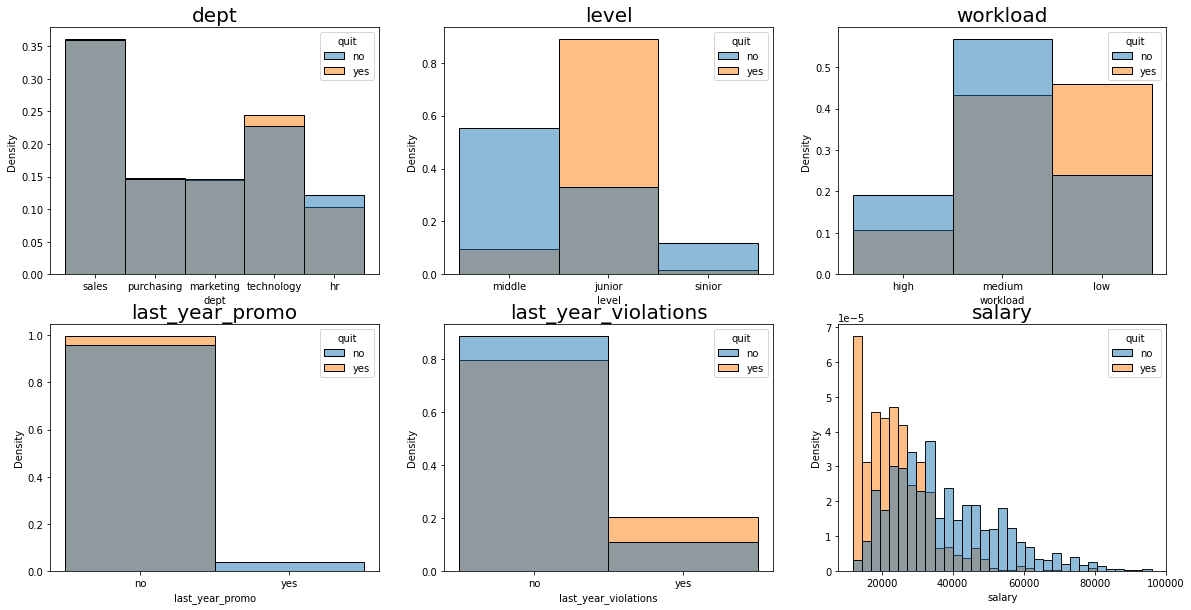

In [69]:
def graph(data,x,axes,hue):
    sns.histplot(ax=axes,data=data,x=x,hue=hue,stat='density', common_norm=False)
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()
cols=['dept','level','workload','last_year_promo','last_year_violations','salary']
for i, feature in enumerate(cols):
    graph(train_quit,train_quit[feature],axes[i],train_quit['quit'])
    axes[i].set_title(feature,fontsize=20)
plt.show()

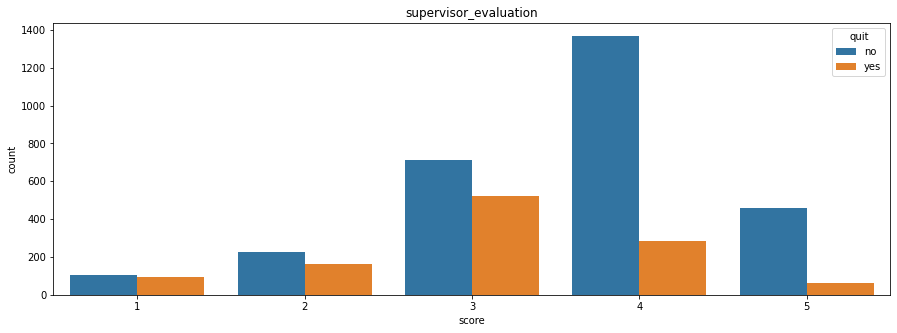

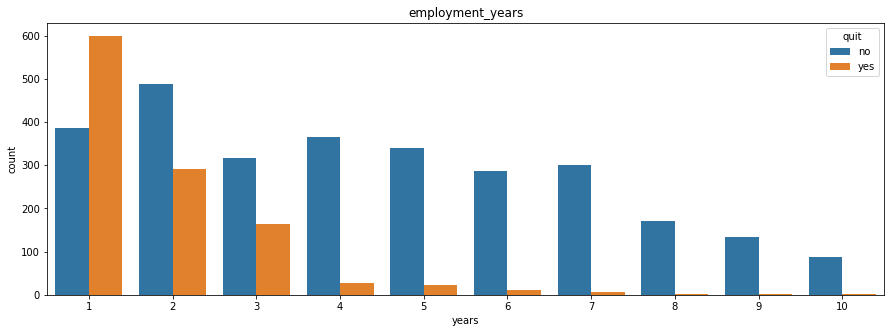

In [70]:
plt.figure(figsize=(15,5))
plt.title('supervisor_evaluation')
sns.countplot(data=train_quit,x='supervisor_evaluation',hue='quit')
plt.xlabel('score')
plt.show()
plt.figure(figsize=(15,5))
plt.title('employment_years')
sns.countplot(data=train_quit,x='employment_years',hue='quit')
plt.xlabel('years')
plt.show()

Большинство уволенных сотрудников работало в департаменте продаж или технологий. Также почти все уволенные- это джуны, у которых не получилось развиться до уровня повыше. "Типичный уволенный сотрудник" имеет среднюю или низкую загруженность, что говорит о том, что загруженность зачастую- не проблема для сотрудников. Подавляющее большинство уволенных проработало в компании всего год, что неудивительно, ведь тяжело уходить с места, где давно работаешь+ компания вряд ли будет увольнять проверенных временем людей. Повышения из уволенных не было ни у кого, что тоже логично, иначе зачем увольняться. Можно заметить, что в процентном соотношении уволенные гораздо чаще нарушали трудовой договор, а руководитель оценивал их на 3-4. Зарплата уволенных также значительно ниже, чем действующих сотрудников.


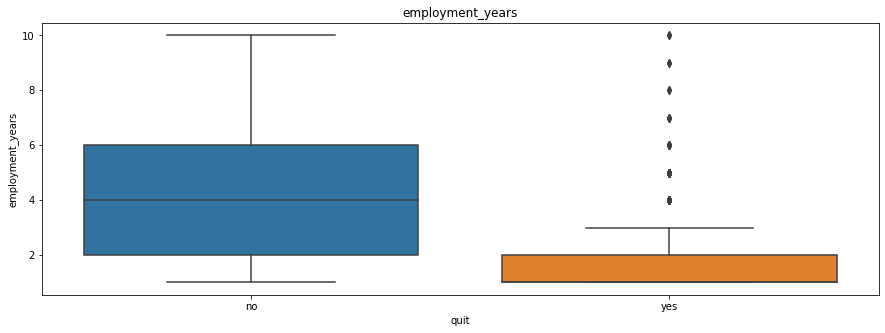

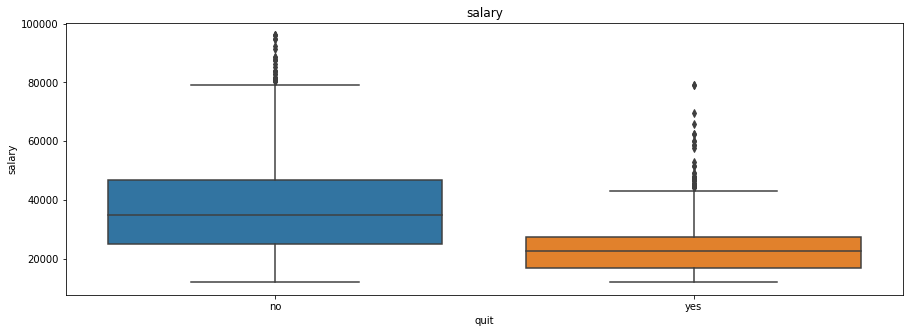

In [71]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_quit['quit'], y=train_quit['employment_years'])
plt.title('employment_years')
plt.show()
plt.figure(figsize=(15,5))
sns.boxplot(x=train_quit['quit'], y=train_quit['salary'])
plt.title('salary')
plt.show()

Теперь проверю распределение признака 'job_satisfaction_rate' для ушедших и оставшихся сотрудников

## Добавление нового признака

In [72]:
y_quit=train_quit['quit']
quit=train_quit.drop(columns=['id','quit'])
train_quit_predict=random.predict(quit)
quit['job_satisfaction_rate']=train_quit_predict
quit['quit']=y_quit
quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,sales,middle,high,2,no,no,4,54000,0.606667,no
1,sales,junior,medium,2,no,no,4,27600,0.821905,no
2,purchasing,middle,medium,5,no,no,1,37200,0.337500,no
3,sales,junior,medium,2,no,yes,3,24000,0.350000,yes
4,marketing,junior,medium,2,no,no,5,25200,0.812500,no
...,...,...,...,...,...,...,...,...,...,...
3995,sales,junior,medium,4,no,no,3,26400,0.528571,no
3996,sales,middle,high,9,no,no,4,52800,0.836000,no
3997,purchasing,junior,low,2,no,yes,4,12000,0.517500,yes
3998,purchasing,middle,medium,2,no,no,4,33600,0.553333,no


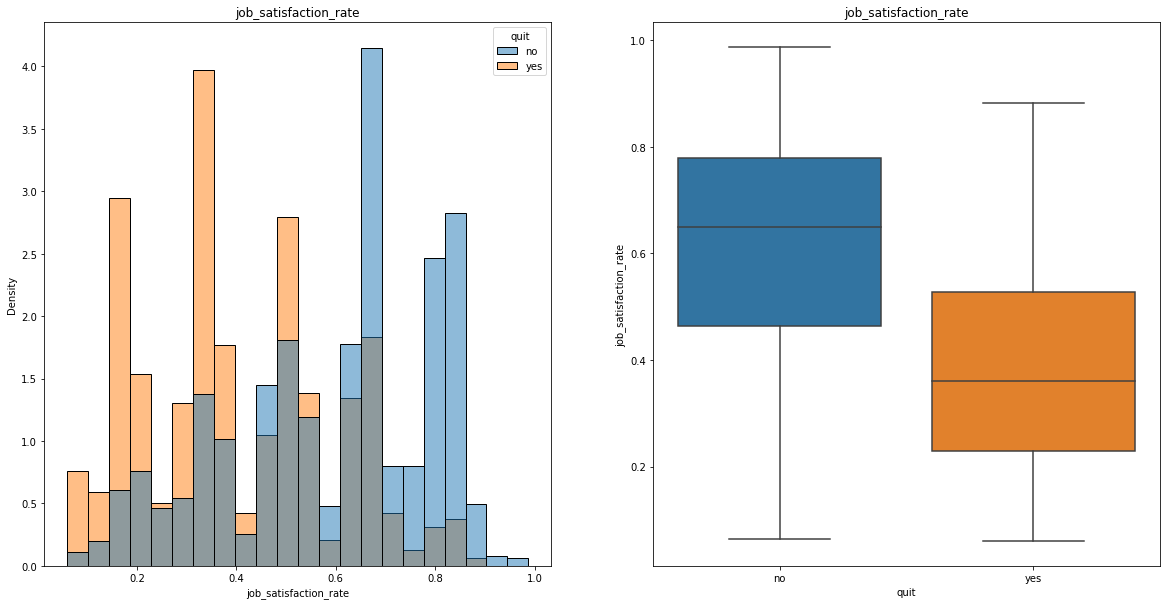

In [73]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
axes=axes.flatten()
graph(quit,quit['job_satisfaction_rate'],axes[0],quit['quit'])
axes[0].set_title('job_satisfaction_rate')
sns.boxplot(x=quit['quit'], y=quit['job_satisfaction_rate'],ax=axes[1])
axes[1].set_title('job_satisfaction_rate')
plt.show()

Судя по графикам, удовлетворенность работой действительно влияет на желание уволиться: средняя удовлетворенность у действующих сотрудников=65%, в то время как у уволившихся-35%.

## Корелляционный анализ данных

Проанализирую корреляцию между признаками.

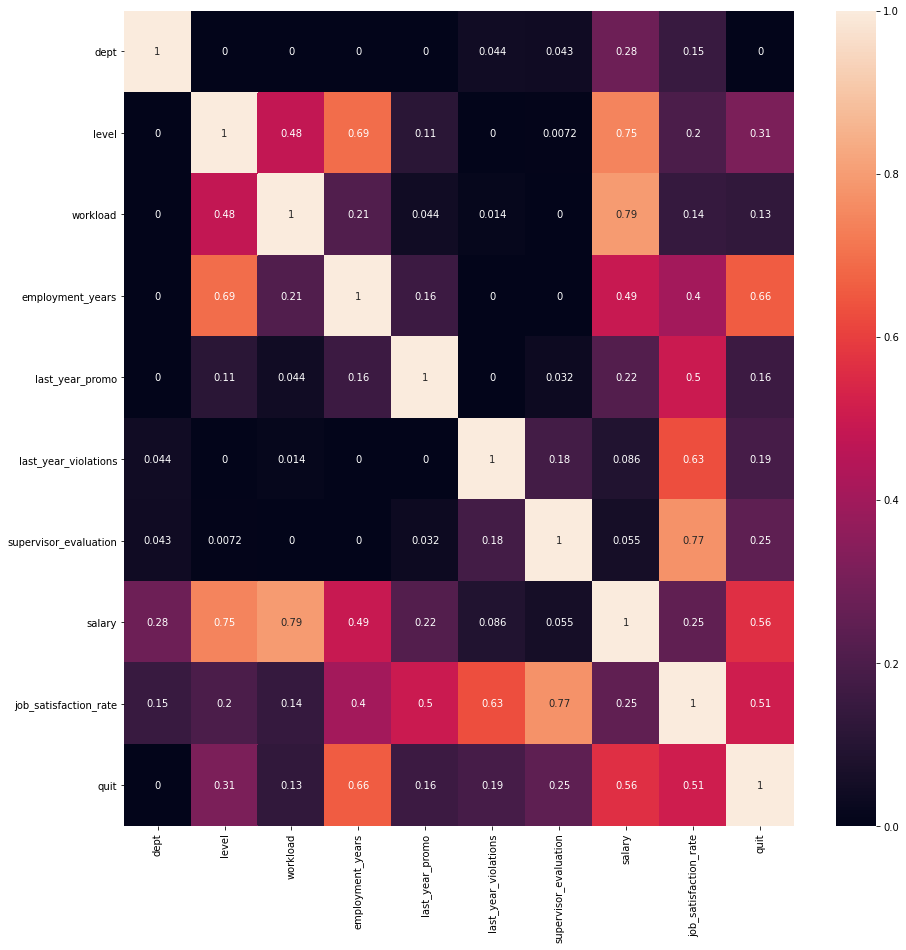

In [74]:
matrix2=(quit.phik_matrix(interval_cols=['salary','job_satisfaction_rate']))
plt.figure(figsize=(15,15))
sns.heatmap(matrix2,annot=True)
plt.show()

Построю хитмап отдельно для каждого класса, чтобы выделить те признаки, которые оказывают влияние внутри каждого из классов таргета. Это может помочь в понимании важности определенных характеристик для принятия решения моделью.

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


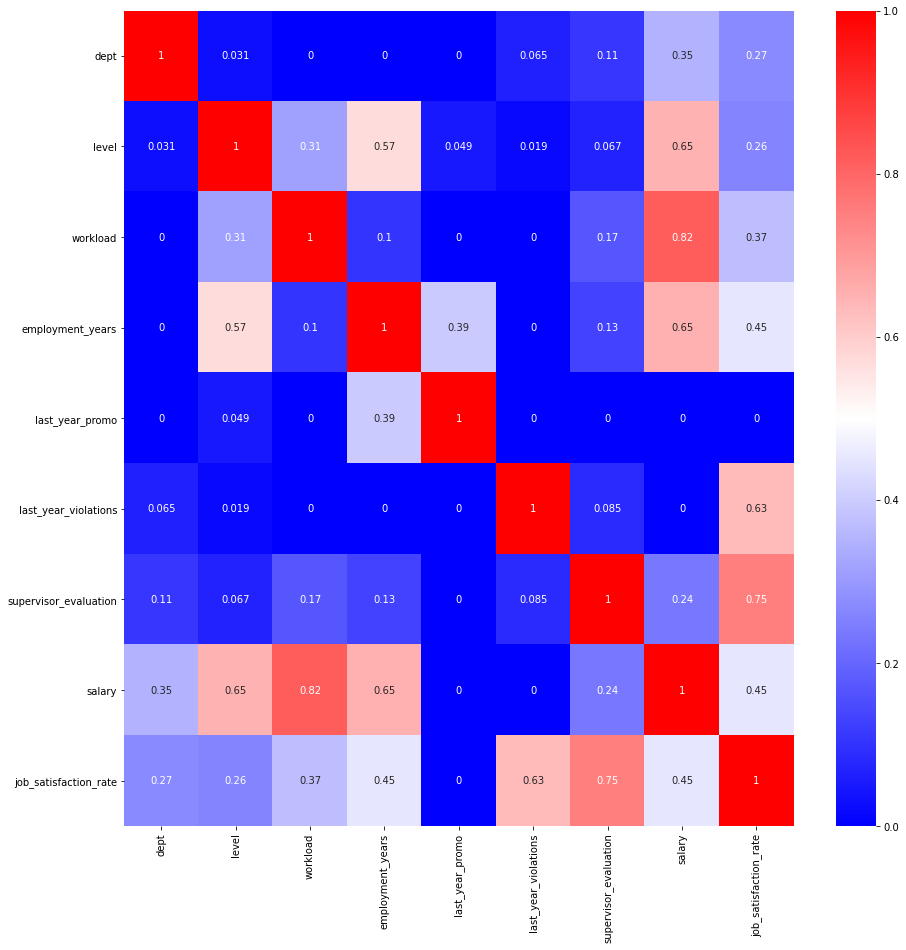

In [75]:
matrix2=(quit[quit['quit']=='yes'].phik_matrix(interval_cols=['salary','job_satisfaction_rate']))
plt.figure(figsize=(15,15))
sns.heatmap(matrix2,annot=True,cmap='bwr')
plt.show()

/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


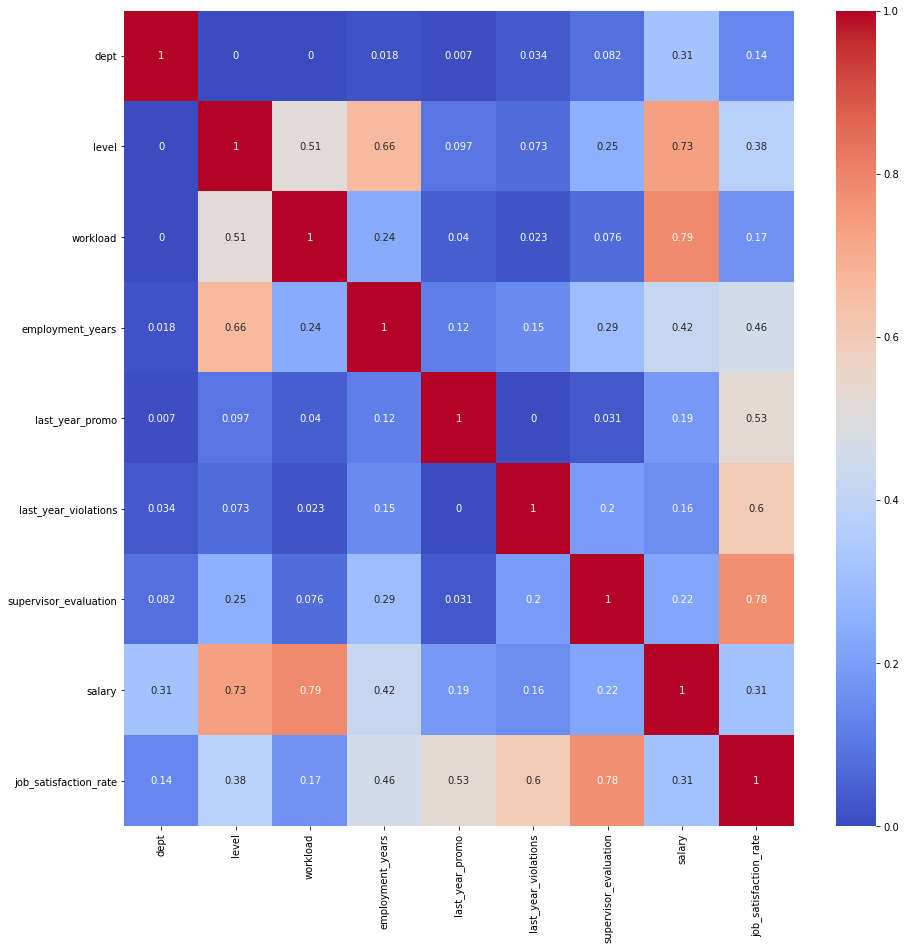

In [76]:
matrix2=(quit[quit['quit']=='no'].phik_matrix(interval_cols=['salary','job_satisfaction_rate']))
plt.figure(figsize=(15,15))
sns.heatmap(matrix2,annot=True,cmap='coolwarm')
plt.show()

На целевой признак сильнее всего влияет 'employment_years', также заметную корреляцию имеют salary и job_satisfaction_rate.

Наблюдается также мультиколлинеарность: у признака 'job_satisfaction_rate' очень большая корреляция с 'supervisor_evaluation' и 'last_year_violations', а у признака 'salary' с 'level' и 'workload'

Также замечу, что у уволившихся сотрудников признак last_year_promo не коррелирует почти ни с одним признаком, кроме employment_years, и то слабо, в то время как у действующих сотрудников этот признак связан с удовлетворенностью работой, зарплатой и уровнем сотрудника. Видимо уволившихся сотрудников соглашались повышать только после достижения определенной длительности работы в компании 

## Добавление нового входного признака

Закодирую целевой признак

In [77]:
le=LabelEncoder()
le.fit(['no','yes'])
quit['quit']=le.transform(quit['quit'])

In [78]:
y_quit=quit['quit']
X_quit=quit.drop(columns=['quit'])
X_quit

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,sales,middle,high,2,no,no,4,54000,0.606667
1,sales,junior,medium,2,no,no,4,27600,0.821905
2,purchasing,middle,medium,5,no,no,1,37200,0.337500
3,sales,junior,medium,2,no,yes,3,24000,0.350000
4,marketing,junior,medium,2,no,no,5,25200,0.812500
...,...,...,...,...,...,...,...,...,...
3995,sales,junior,medium,4,no,no,3,26400,0.528571
3996,sales,middle,high,9,no,no,4,52800,0.836000
3997,purchasing,junior,low,2,no,yes,4,12000,0.517500
3998,purchasing,middle,medium,2,no,no,4,33600,0.553333


## Подготовка данных и обучение модели

In [79]:
RANDOM_STATE=42
ohe_columns=['dept','last_year_promo','last_year_violations']
ord_columns=['level','workload']
num_columns=['employment_years','job_satisfaction_rate','supervisor_evaluation','salary']
ohe_pipe=Pipeline([
    ('simpleImputerohe',SimpleImputer(missing_values=np.nan ,strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'))
])
ord_pipe=Pipeline([
    ('SimpleImputer_before_ord',SimpleImputer(missing_values=np.nan,strategy='most_frequent')),
    ('ord',OrdinalEncoder(categories=[
        ['junior','middle','sinior'],
        ['low','medium','high']
    ],
    handle_unknown='use_encoded_value', unknown_value=np.nan
)),
    ('SimpleImputer_after_ord',SimpleImputer(missing_values=np.nan,strategy='most_frequent'))
])
data_preprocessor=ColumnTransformer([
    ('ohe',ohe_pipe,ohe_columns),
    ('ord',ord_pipe,ord_columns),
    ('num',StandardScaler(),num_columns)],
    remainder='passthrough'
)
pipe_final=Pipeline([
    ('preprocessor',data_preprocessor),
    ('feature_selection',SelectKBest(f_classif,k=6)),
    ('models',DecisionTreeClassifier(random_state=RANDOM_STATE))
])
param_grid=[
    {
     'models':[DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth':range(1,5)
    },
    {
     'models':[LogisticRegression(random_state=RANDOM_STATE)],
     'preprocessor__num':[StandardScaler(),MinMaxScaler(),'passthrough'],
     'models__C':range(1,3)
    },
    {
     'models':[KNeighborsClassifier()],
     'models__n_neighbors':range(1,10),
     'preprocessor__num':[StandardScaler(),MinMaxScaler(),'passthrough']
    }
]
grid=GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3,
    refit='roc_auc',
    scoring='roc_auc'
)
grid.fit(X_quit, y_quit)
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_) 
print ('Метрика лучшей модели на кросс-валидационной выборке:', grid.best_score_)


Fitting 5 folds for each of 37 candidates, totalling 185 fits
[CV 1/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=1;, score=0.787 total time=   0.1s
[CV 2/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=1;, score=0.762 total time=   0.1s
[CV 3/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=1;, score=0.762 total time=   0.0s
[CV 4/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=1;, score=0.790 total time=   0.1s
[CV 5/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=1;, score=0.798 total time=   0.0s
[CV 1/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2;, score=0.877 total time=   0.0s
[CV 2/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2;, score=0.874 total time=   0.1s
[CV 3/5] END models=DecisionTreeClassifier(random_state=42), models__max_depth=2;, score=0.872 total time=   0.0s
[CV 4/5] END models=Decisi

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END models=LogisticRegression(random_state=42), models__C=1, preprocessor__num=passthrough;, score=0.907 total time=   0.8s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END models=LogisticRegression(random_state=42), models__C=1, preprocessor__num=passthrough;, score=0.897 total time=   1.0s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END models=LogisticRegression(random_state=42), models__C=1, preprocessor__num=passthrough;, score=0.891 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END models=LogisticRegression(random_state=42), models__C=1, preprocessor__num=passthrough;, score=0.897 total time=   0.9s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END models=LogisticRegression(random_state=42), models__C=1, preprocessor__num=passthrough;, score=0.917 total time=   0.8s
[CV 1/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=StandardScaler();, score=0.922 total time=   0.4s
[CV 2/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=StandardScaler();, score=0.906 total time=   0.3s
[CV 3/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=StandardScaler();, score=0.914 total time=   0.3s
[CV 4/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=StandardScaler();, score=0.907 total time=   0.3s
[CV 5/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=StandardScaler();, score=0.926 total time=   0.2s
[CV 1/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=MinMaxScaler();, score=0.923 total time=   0.3s
[CV 2/5] END models=LogisticRegression(ra

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=passthrough;, score=0.907 total time=   0.8s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=passthrough;, score=0.895 total time=   0.8s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=passthrough;, score=0.889 total time=   0.7s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=passthrough;, score=0.903 total time=   0.7s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END models=LogisticRegression(random_state=42), models__C=2, preprocessor__num=passthrough;, score=0.917 total time=   0.8s
[CV 1/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=StandardScaler();, score=0.827 total time=   0.1s
[CV 2/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=StandardScaler();, score=0.838 total time=   0.1s
[CV 3/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=StandardScaler();, score=0.850 total time=   0.1s
[CV 4/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=StandardScaler();, score=0.821 total time=   0.1s
[CV 5/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=StandardScaler();, score=0.852 total time=   0.1s
[CV 1/5] END models=KNeighborsClassifier(), models__n_neighbors=1, preprocessor__num=MinMaxScaler();, score=0.843 total time=   0.1s
[CV 2/5] END models=KNeighborsClassifier(), models__n_neigh

In [80]:
test_features=test_features.merge(test_target_quit,on='id')

In [81]:
y_test_quit=test_features['quit']
X_test_quit=test_features.drop(columns=['quit','id'])
y_pred_quit=grid.predict_proba(X_test_quit)[:,1]
roc_auc_score(y_test_quit,y_pred_quit)

0.9255584797489311

## Промежуточный вывод

Лучше всего с задачей справилась модель KNeighborsClassifier(n_neighbors=9). Возможно, так происходит из-за того, что глобально люди одинаково рациональны в выборе работы: они редко увольняются после долгого пребывания на одном месте, после повышения или уж тем более после того, как руководитель высоко оценил их навыки. Поэтому модели ближайших соседей легко ориентироваться на похожие "объекты", т.к. их поведение зачастую всегда одинаково

# Общий вывод

Задача была в том, чтобы на основе имеющихся данных предсказать удовлетворенность сотрудника его работой и предсказать его увольнение.

Сперва я убедился в отсутствии дубликатов и правильном названии столбцов. Затем провел исследовательский анализ данных на наличие выбросов и интересных результатов. Далее построил матрицу корреляции, чтобы выявить мультиколлинеарность. После этого, используя пайплайны, выбрал из нескольких моделей лучшую по собственной метрике и по roc_auc. 

В целом, можно сказать, что уволенным попросту не нравилась их работа, связано это не с их нагрузкой, а прежде всего с удовлетворенностью их рабочим местом, которое в свою очередь состоит из того, как высоко ценит сотрудника руководитель, получал ли он повышение в прошлом году.

Что касается предложений бизнесу, можно попробовать мотивировать джуниоров(поскольку эта категория имеет наименьшую привязанность к компании) за переработку или устраивать им митапы или корпоративы, чтобы они лояльнее относились к компании и работали больше. Также очень важно не относиться к ним, как к наемникам, ведь любому человеку важно чувствовать, что его ценят, что он делает что-то полезное для общества. Таким образом, есть шанс, что новички прослужат компании еще долго, а та в свою очередь избавится от текучки кадров.